[1.8751040687119611, 4.694091132974175, 7.854757438237613, 10.995540734875467, 14.13716839104647]


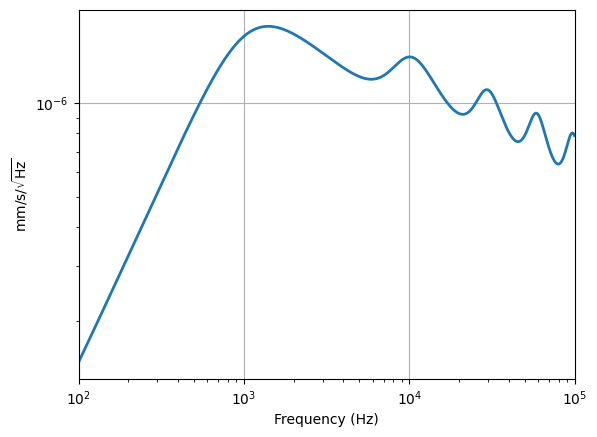

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 344
E = 148e9
rho = 2600
b = 2e-6
h = 340e-9
L = 490e-6
miu = 1e-6
num_modes = 5
I = (b * h**3) / 12
A = b * h
m = b * h * rho

# Define the equation
def equation(beta_L):
    return np.cos(beta_L) * np.cosh(beta_L) + 1

# Find the roots
roots = []
for n in range(1, num_modes + 1):
    bracket_start = (n - 1) * np.pi + 0.1
    bracket_end = n * np.pi - 0.1
    beta_L = sp.symbols('beta_L')
    expr = sp.cos(beta_L) * sp.cosh(beta_L) + 1
    root = sp.nsolve(expr, beta_L, (bracket_start + bracket_end) / 2)    
    roots.append(float(root))
# print(roots)
x = sp.symbols('x')
phi_j = []
omega_j = []
freq_j = []
for j in range(num_modes):
    beta_j = roots[j] / L
    term1 = sp.cos(beta_j * x) - sp.cosh(beta_j * x)
    term2 = (np.cos(beta_j * L) + np.cosh(beta_j * L)) / (np.sin(beta_j * L) + np.sinh(beta_j * L))
    term3 = sp.sin(beta_j * x) - sp.sinh(beta_j * x)
    phi = term1 - term2 * term3
    phi_j.append(phi)
    omega = beta_j**2 * np.sqrt(E * I / (rho * A))
    omega_j.append(omega)
    freq_j.append(omega / (2 * np.pi))

K = 1.380649e-23
T = 295
rho_0 = 1.2064
const = []
for j in range(num_modes):
    phi_L = phi_j[j].subs(x, L)
    phi_squared = sp.integrate(phi_j[j]**2, (x, 0, L))
    const_val = K * T * (phi_L**2) / (np.pi * (rho * b * h)**2 * phi_squared)
    const.append(float(const_val))

def H_j(omega_j, omega, C):
    return 1 / (omega_j**2 - omega**2 + 1j * omega * C / (rho * b * h))

num_fre = 100000
low = 100
high = 100000
fre_range = np.linspace(low, high, num_fre)
Gww_dot = np.zeros(num_fre)
Sww_thermal = np.zeros(num_fre)

for n in range(num_fre):
    omega_n = 2 * np.pi * fre_range[n]
    C = (3 * np.pi * miu + 0.75 * np.pi * b * np.sqrt(2 * miu * rho * omega_n))
    for j in range(num_modes):
        H = abs(H_j(omega_j[j], omega_n, C))
        Sww_j = const[j] * C * H**2
        Sww_thermal[n] += Sww_j
    Sww_dot = Sww_thermal[n] * (omega_n)**2
    Gww_dot[n] = np.sqrt(Sww_dot * 4 * np.pi)

# Plot the frequency response
plt.figure()
plt.plot(fre_range, Gww_dot, linewidth=2)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('mm/s/$\sqrt{\mathrm{Hz}}$')
plt.xlim([1e2, 1e5])
plt.show()
